### joint-RPCA

In [ ]:
biom convert \
 -i jrpca_mtb_feattab.txt \
 -o jrpca_mtb_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtb_feattab.biom \
 --output-path jrpca_mtb_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtg_feattab.txt \
 -o jrpca_mtg_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtg_feattab.biom \
 --output-path jrpca_mtg_feattab.qza \
 --type FeatureTable[Frequency]


In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca_mtg/jrpca_mtb_feattab.qza jrpca_mtg/jrpca_mtg_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/cross_validation_error.qza


In [ ]:
qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/volatility_plot.qzv

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/emperor-biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt\
    --m-metadata-column 'condition'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/permanova-cond.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt\
    --m-metadata-column 'schedule'\
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/permanova-sch.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt\
    --m-metadata-column 'diet'\
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/permanova-diet.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt\
    --m-metadata-column 'phase'\
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/permanova-phase.qzv

In [ ]:
!qiime gemelli filter-ordination \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_biplot.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_mtb_feattab.qza \
    --o-subset-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/ordination-mtb.qza

!qiime gemelli filter-ordination \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_biplot.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_mtg_feattab.qza \
    --o-subset-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/ordination-mtg.qza

In [ ]:
!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/ordination-mtb.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_mtb_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_mtb_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/Qurro-mtb.qzv

!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/ordination-mtg.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_mtg_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_mtg_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/Qurro-mtg.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_table.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/ordination-mtb.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtb_table.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/ordination-mtg.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtg_table.qza

In [ ]:
qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_table

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtb_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtb_table

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtg_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtg_table

In [1]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_table/Correlation.tsv', sep='\t', index_col=0)
#correlation_table = q2.Artifact.load('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza')
#correlation_table_df = correlation_table.view(pd.DataFrame)

/opt/anaconda3/envs/mmvec-qiime2-2020.11/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
correlation_table.shape

(3845, 3845)

In [3]:
correlation_table.head()

,1410,34393,27447,34419,32635,36594,1527,21184,35628,36602,...,PF13648.9,PF10882.11,PF17999.4,PF10797.12,PF10941.11,PF20310.1,PF11074.11,PF14505.9,PF01323.23,PF06998.14
featureid,,,,,,,,,,,,,,,,,,,,,
1410,1.000000,-0.999995,0.999874,-0.873993,-0.999994,0.999878,0.999996,-0.998981,0.999985,0.999996,...,0.999995,-0.999999,0.999997,0.999988,0.999999,0.999986,0.999948,0.999920,0.999998,-0.999047
34393,-0.999995,1.000000,-0.999920,0.872444,1.000000,-0.999823,-0.999999,0.998833,-0.999997,-1.000000,...,-0.999998,0.999995,-0.999987,-0.999975,-0.999988,-0.999996,-0.999927,-0.999884,-0.999994,0.999159
27447,0.999874,-0.999920,1.000000,-0.866293,-0.999923,0.999505,0.999912,-0.998144,0.999946,0.999913,...,0.999910,-0.999879,0.999849,0.999827,0.999846,0.999935,0.999751,0.999650,0.999874,-0.999485
34419,-0.873993,0.872444,-0.866293,1.000000,0.872291,-0.881223,-0.872627,0.894076,-0.871309,-0.872681,...,-0.872621,0.873934,-0.874838,-0.875405,-0.874810,-0.871498,-0.876861,-0.879019,-0.873794,0.854011
32635,-0.999994,1.000000,-0.999923,0.872291,1.000000,-0.999818,-0.999999,0.998820,-0.999998,-1.000000,...,-0.999998,0.999993,-0.999985,-0.999973,-0.999987,-0.999997,-0.999923,-0.999879,-0.999993,0.999173


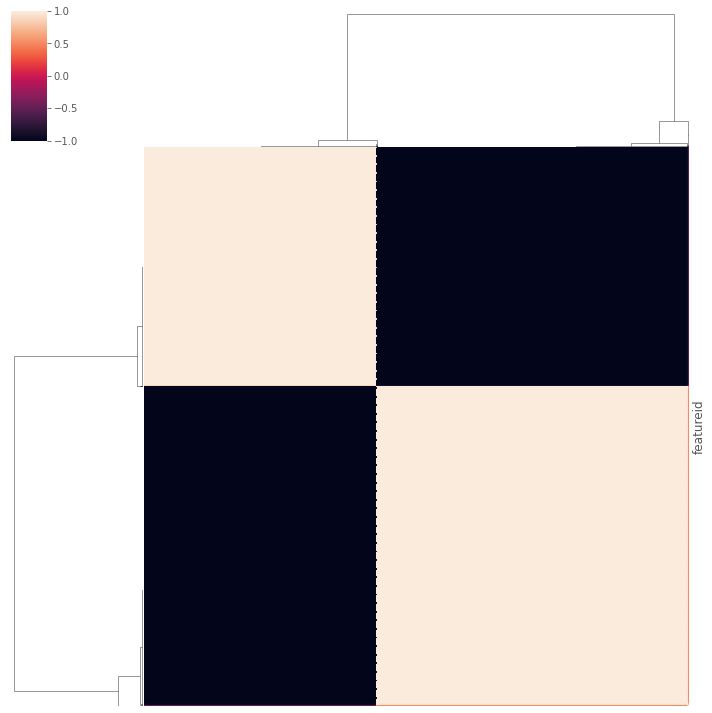

In [4]:
# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_table/Correlation_heatmap_all.png',
            dpi=300,bbox_inches='tight')

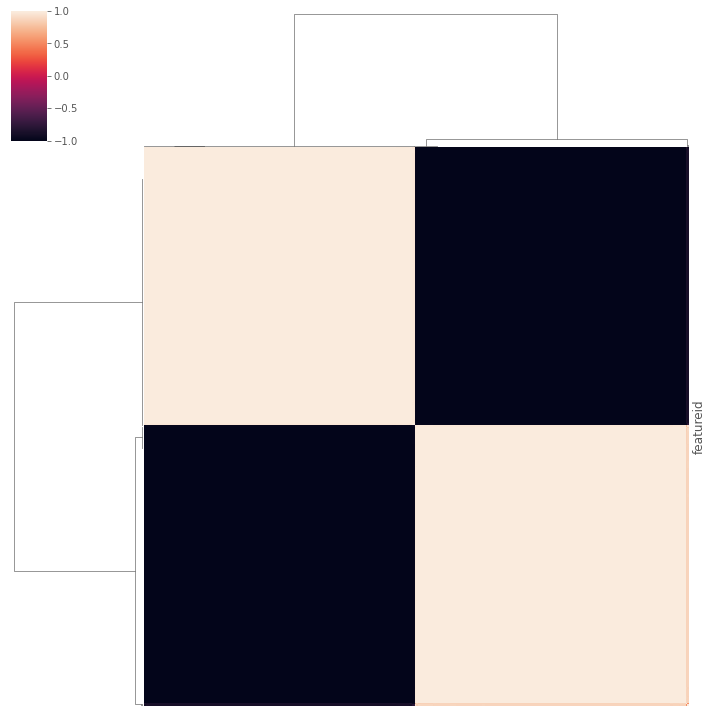

In [5]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtb_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtb_table/Correlation_heatmap_mtb.png',
            dpi=300,bbox_inches='tight')

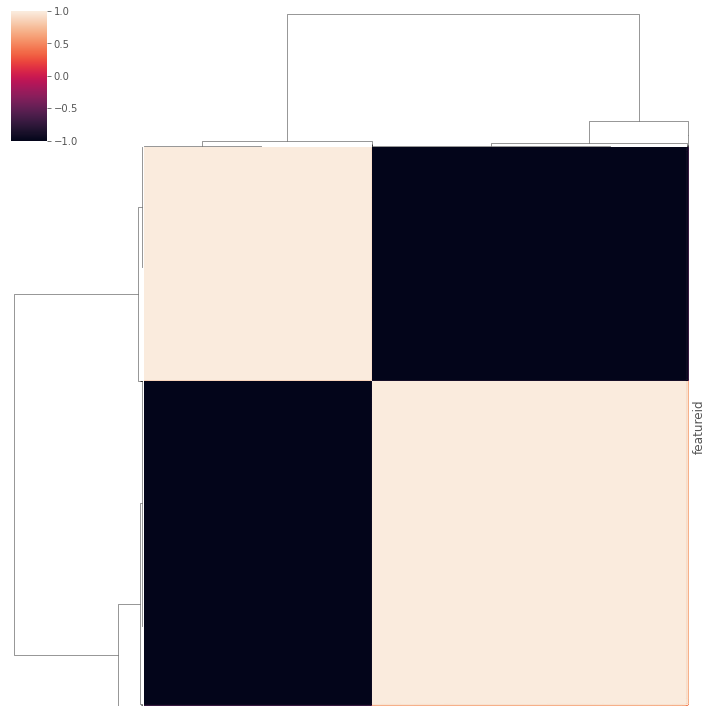

In [6]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtg_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_mtg_table/Correlation_heatmap_mtg.png',
            dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i jrpca_mtbcarbSCFA_feattab.txt \
 -o jrpca_mtbcarbSCFA_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtbcarbSCFA_feattab.biom \
 --output-path jrpca_mtbcarbSCFA_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtg5per_feattab.txt \
 -o jrpca_mtg5per_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtg5per_feattab.biom \
 --output-path jrpca_mtg5per_feattab.qza \
 --type FeatureTable[Frequency]


In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca_mtg/jrpca_mtbcarbSCFA_feattab.qza jrpca_mtg/jrpca_mtg5per_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_qurro_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_qurro_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/cross_qrro_validation_error.qza


In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_qurro_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro_table


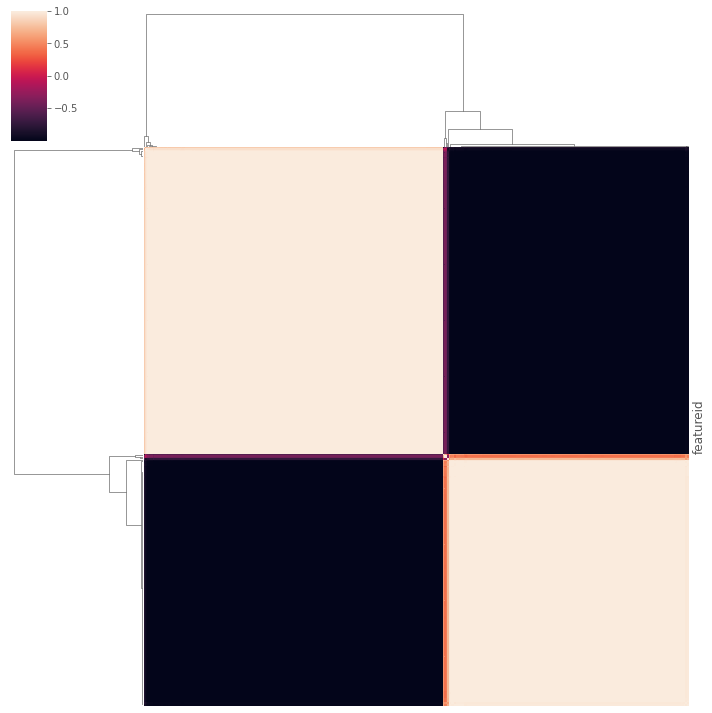

In [7]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro_table/Correlation_heatmap_qurro.png',
            dpi=300,bbox_inches='tight')

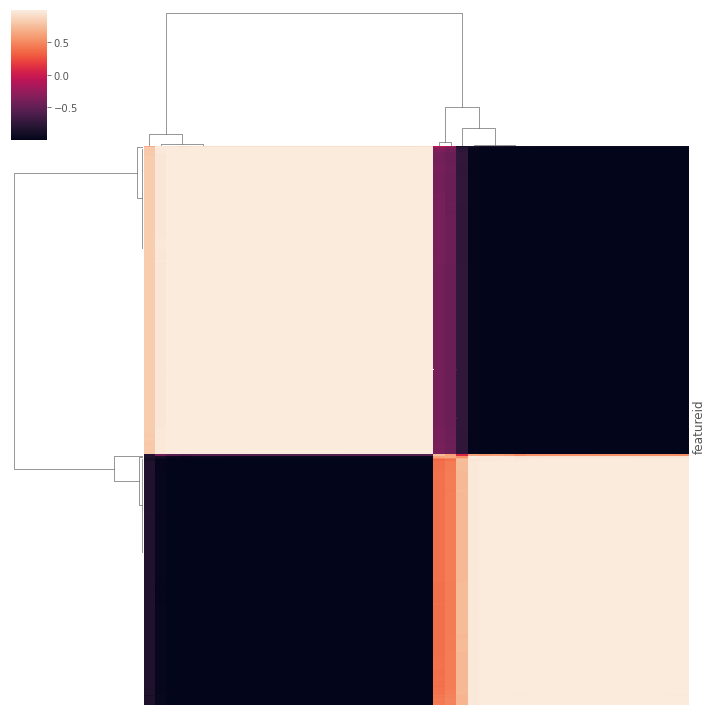

In [8]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro_table/Correlation_sub.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro_table/Correlation_heatmap_qurro_sub.png',
            dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i jrpca_mtgFANA_450aldex_feattab.txt \
 -o jrpca_mtgFANA_450aldex_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtgFANA_450aldex_feattab.biom \
 --output-path jrpca_mtgFANA_450aldex_feattab.qza \
 --type FeatureTable[Frequency]

qiime gemelli joint-rpca \
    --i-tables jrpca_mtg/jrpca_mtbcarbSCFA_feattab.qza jrpca_mtg/jrpca_mtgFANA_450aldex_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_qurro2_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_qurro2_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/cross_qrro2_validation_error.qza


In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/joint_qurro2_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro2_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro2_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro2_table


<Figure size 21600x21600 with 0 Axes>

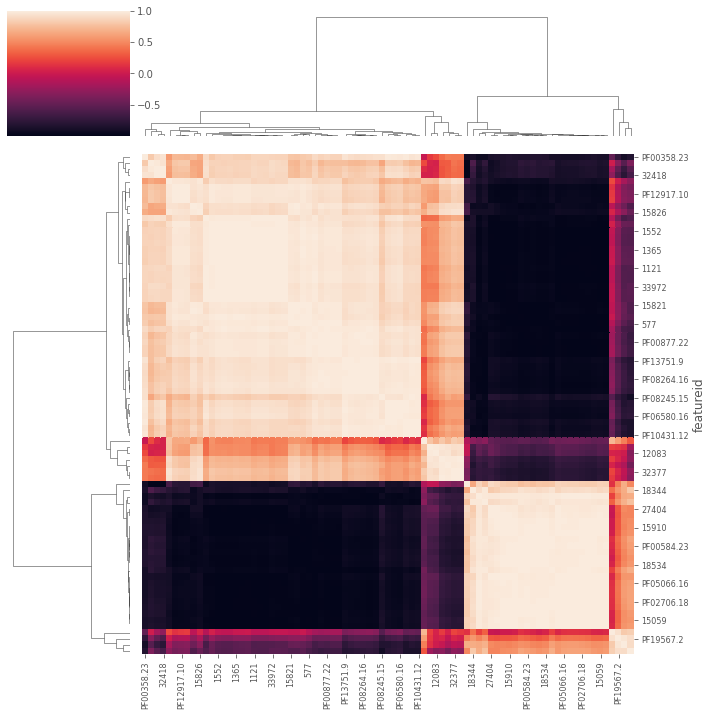

In [9]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro2_table/Correlation.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
#plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_heatmap_qurro2_sub.png',
            #dpi=300,bbox_inches='tight')

<Figure size 21600x21600 with 0 Axes>

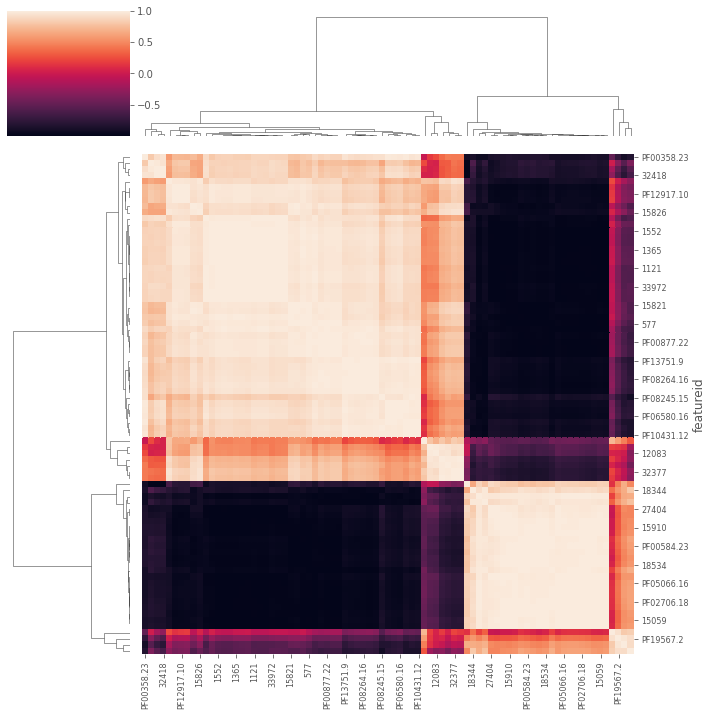

In [9]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtg/correlation_qurro2_table/Correlation.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
#plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_heatmap_qurro2_sub.png',
            #dpi=300,bbox_inches='tight')

## MTX vs MTG

In [ ]:
biom convert \
 -i jrpca_mtx_annot_feattab.txt \
 -o jrpca_mtx_annot_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtx_annot_feattab.biom \
 --output-path jrpca_mtx_annot_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtg_annot_feattab.txt \
 -o jrpca_mtg_annot_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtg_annot_feattab.biom \
 --output-path jrpca_mtg_annot_feattab.qza \
 --type FeatureTable[Frequency]

qiime gemelli joint-rpca \
    --i-tables jrpca_mtx_mtg/jrpca_mtx_annot_feattab.qza jrpca_mtx_mtg/jrpca_mtg_annot_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/cross_validation_error.qza

qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/volatility_plot.qzv

qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/emperor-biplot.qzv

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_table

<Figure size 21600x21600 with 0 Axes>

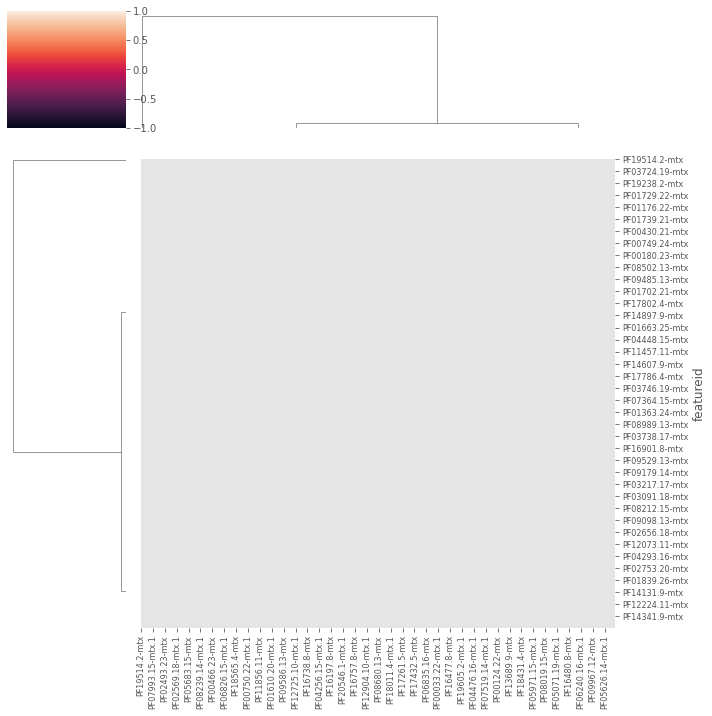

<Figure size 432x288 with 0 Axes>

In [11]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_table/Correlation.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_table/Correlation_heatmap.png',
            dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i jrpca_mtx5per_annot_feattab.txt \
 -o jrpca_mtx5per_annot_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtx5per_annot_feattab.biom \
 --output-path jrpca_mtx5per_annot_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtg5per_annot_feattab.txt \
 -o jrpca_mtg5per_annot_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtg5per_annot_feattab.biom \
 --output-path jrpca_mtg5per_annot_feattab.qza \
 --type FeatureTable[Frequency]

qiime gemelli joint-rpca \
    --i-tables jrpca_mtx_mtg/jrpca_mtx5per_annot_feattab.qza jrpca_mtx_mtg/jrpca_mtg5per_annot_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_5per_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_5per_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/cross_5per_validation_error.qza

qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/cross_5per_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/volatility_5per_plot.qzv

qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_5per_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/emperor-5per-biplot.qzv

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/joint_5per_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_5per_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_5per_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_5per_table

<Figure size 21600x21600 with 0 Axes>

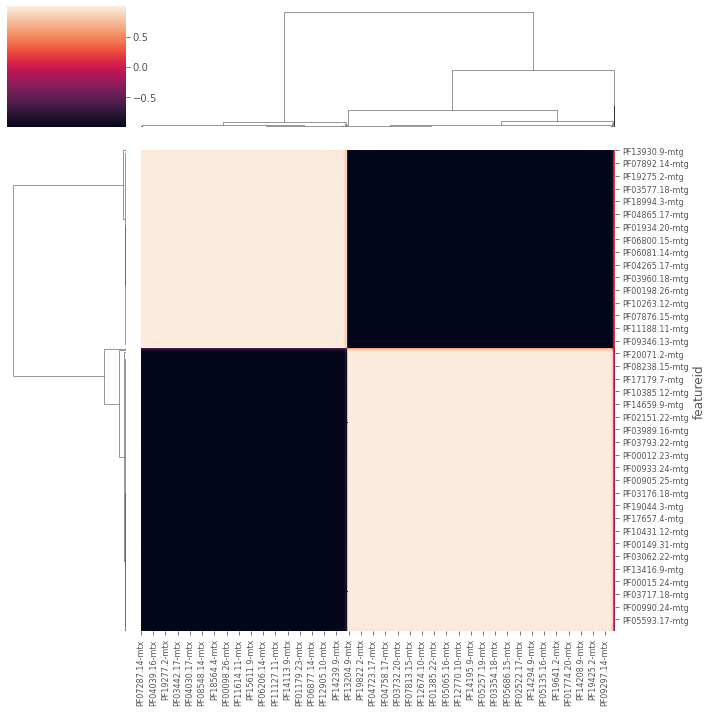

<Figure size 432x288 with 0 Axes>

In [12]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_5per_table/Correlation_sub.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca_mtx_mtg/correlation_5per_table/Correlation_heatmap.png',
            dpi=300,bbox_inches='tight')